# The sparks Foundation - Data science and Business Analytics internship
Task 1 - Prediction using supervised machine learning
In this task it is required to predict the percentage of student on the basis of number of hours by using linear regression model.
Steps:
Step1 :Importing the dataset
step2:Visualising the dataset
step3: Data preparation
step4: Training the algorithm
step5:Visualising the model
step6:Marking predictions
step7: Evaluating the model


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [11]:
df=pd.read_csv("Task1.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [15]:
#To find the number of rows and columns
df.shape

(25, 2)

In [6]:
#To find the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.count()

Hours     25
Scores    25
dtype: int64

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#Check if it contains null or missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2: Visualize the data

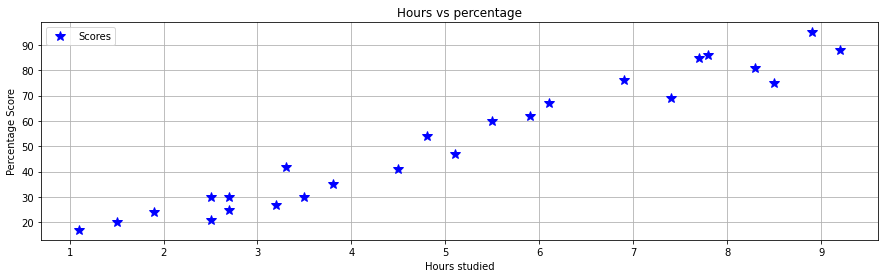

In [10]:
# Plot the dataset
plt.rcParams["figure.figsize"]=[15,4]
df.plot(x='Hours',y='Scores',style='*',color='blue',markersize=10)
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()                          

In [19]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Preparation

In [20]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
x=df['Hours']
y=df['Scores']

In [22]:
#INTEGER VALUES
X=df.iloc[:,:1].values
y=df.iloc[:,1:].values
X
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [23]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
X_train

22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5
Name: Hours, dtype: float64

In [52]:
X_test

5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
Name: Hours, dtype: float64

In [26]:
len(X_train)

20

In [27]:
len(X_test)

5

In [28]:
len(y_train)

20

In [29]:
len(y_test)

5

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

# Visualising the model 
After training the model we have to visualise it .

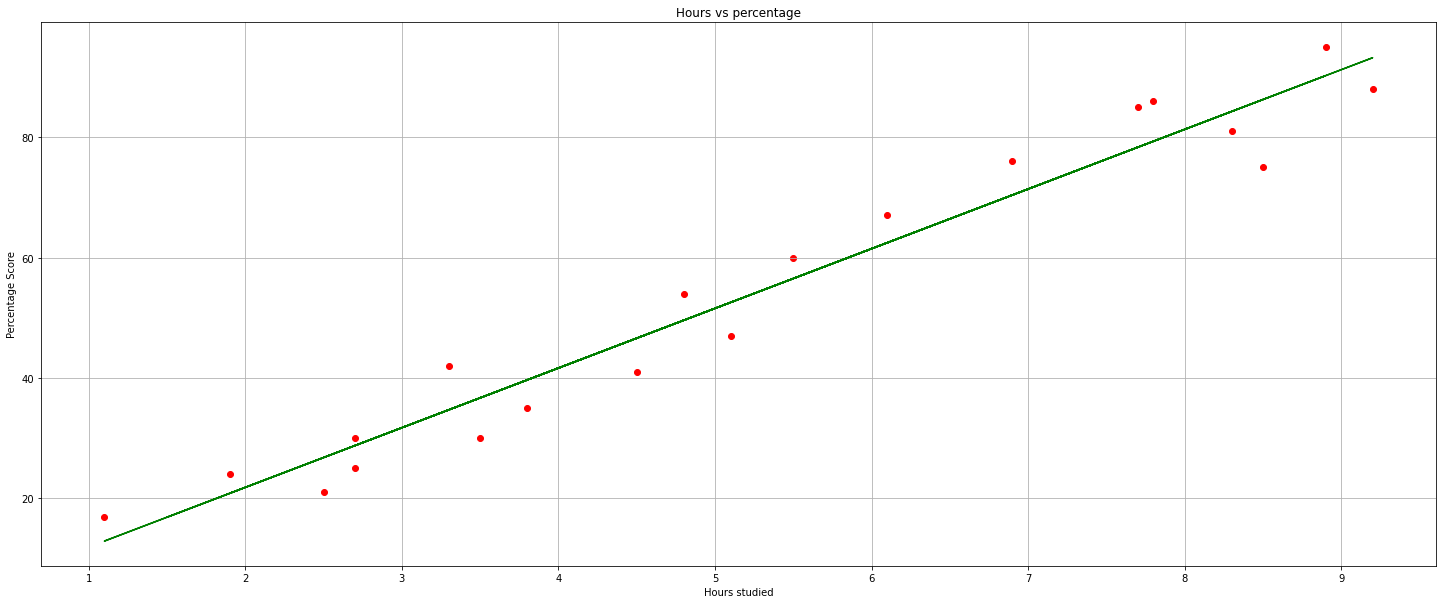

In [38]:

line = model.coef_ * X + model.intercept_

# plotting for training data
plt.rcParams["figure.figsize"]=[25,10]
plt.scatter(X_train,y_train,color='red')
plt.plot(x,line,color='green')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show() 

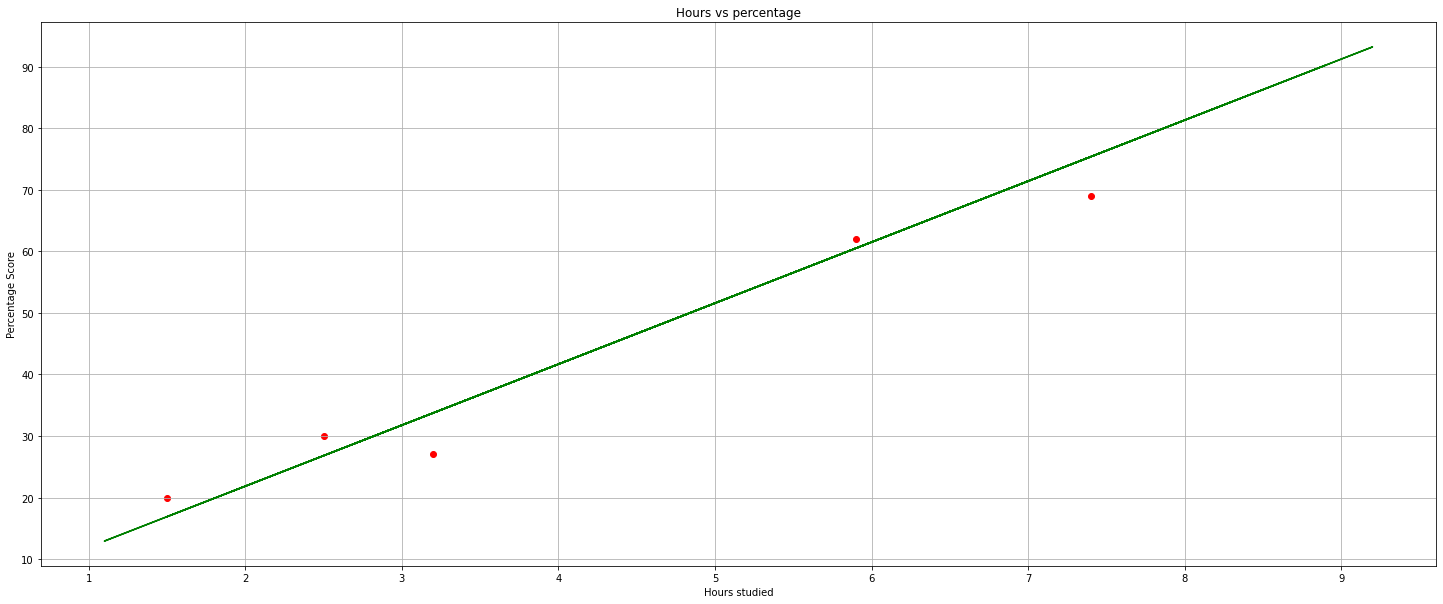

In [39]:
plt.rcParams["figure.figsize"]=[25,10]
plt.scatter(X_test,y_test,color='red')
plt.plot(x,line,color='green')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show() 

# Making Predictions

In [40]:
print(X_test)

5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
Name: Hours, dtype: float64


In [43]:
y_pred=model.predict(X_test.values.reshape(-1,1)) 

In [44]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [45]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [47]:
#comparing actual versus prediction
comp=pd.DataFrame({'Actual':[y_test],'predicted':[y_pred]})
comp

,Actual,predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [49]:
# Testing with your own data
hours=9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


# Hence it can be concluded that the predcited studies for 9.25hours is 93.69173249

# Step -7 Evaluating the model.

In [ ]:
    # In the last step we are going to evaluate our trained model by calculating mean absolute error

In [52]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error 4.183859899002975
